## Amazon Sales Data Analysis

In [65]:
#Import Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data

In [2]:
data = pd.read_feather(r"E:\Data Analytics\Data Analytics\python_projects\Amazon sales analysis/data.ftr")

In [3]:
data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
#The data contains electronics store purchases broken down by Order ID, product type,Quantity, cost, purchase address, etc

In [4]:
data.shape

(186850, 6)

### Data cleaning and formatting

In [5]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [66]:
data = data.dropna(how = "all")
#In These 545 observations entire row have missing value , so we can drop these 545 rows.

In [7]:
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [9]:
data[data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [67]:
#Total 618 duplicate rows are there.

In [10]:
data = data.drop_duplicates()

In [11]:
data.shape

(185687, 6)

### Data analysis

#### problem statement 1: Which month has max sale ?

In [13]:
def return_month(x):
    return x.split('/')[0]

In [14]:
data['Month'] = data['Order Date'].apply(return_month)

In [ ]:
data.dtypes

In [15]:
print(data['Month'].unique())

['04' '05' 'Order Date' '08' '09' '12' '01' '02' '03' '07' '06' '11' '10']


In [19]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [20]:
data['Month'] = data['Month'].replace('Order Date', pd.NA)
data = data.dropna(subset=['Month'])
data['Month'] = data['Month'].astype(int)
data.replace([np.inf, -np.inf], pd.NA, inplace=True)
# we need integer value of month so convert date-type into integer

In [17]:
data['Month'].unique()

array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10])

In [21]:
data['Quantity Ordered'] = data['Quantity Ordered'].astype(int)
data['Price Each'] = data['Price Each'].astype(float)

In [22]:
data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [23]:
data['sales'] = data['Quantity Ordered'] * data['Price Each']

In [24]:
data.groupby(['Month'])['sales'].sum()

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sales, dtype: float64

<Axes: xlabel='Month'>

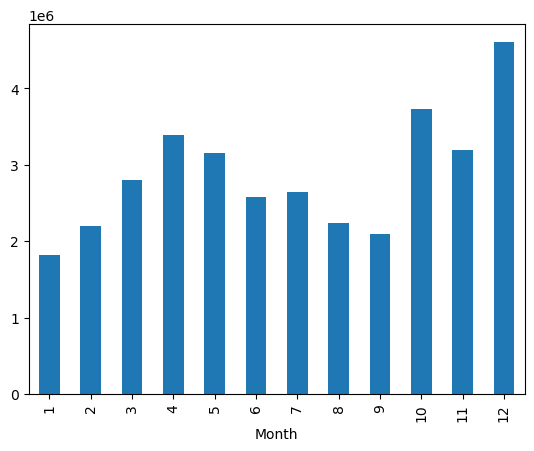

In [25]:
data.groupby(['Month'])['sales'].sum().plot(kind='bar')

In [68]:
# y-axis scale : 1e^6, E stands for exponential , in short it is *10^

# So, 1e6 or 1e^6 OR 1 exponent 6 is the same as 1*10^6 which is same as 1,000,000


##### Observations: December month has maximum sales

#### problem statement 2: Which city has max order ?

In [26]:
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


In [27]:
data['Purchase Address'][0]

'917 1st St, Dallas, TX 75001'

In [28]:
data['city'] = data['Purchase Address'].str.split(',').str.get(1)

In [29]:
data['city']

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: city, Length: 185686, dtype: object

In [30]:
pd.value_counts(data['city'])

city
 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: count, dtype: int64

<Axes: ylabel='count'>

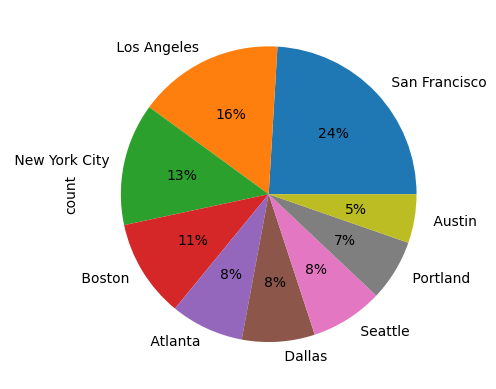

In [31]:
pd.value_counts(data['city']).plot(kind='pie' , autopct = '%1.0f%%')

#### Insights:
San Francisco has max orders.

more than 50% of orders placed in 3 cities- New York , Los Angeles and San Francisco.

#### problem statement 3: Max sold products and correlation with the price

In [32]:
data.columns


Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'sales', 'city'],
      dtype='object')

In [33]:
df = data.groupby(['Product']).agg({'Quantity Ordered':'sum' , 'Price Each':'mean'})

In [34]:
df = df.reset_index()

In [35]:
df

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


In [36]:
products = df['Product'].values

Text(0, 0.5, 'Avg price of product')

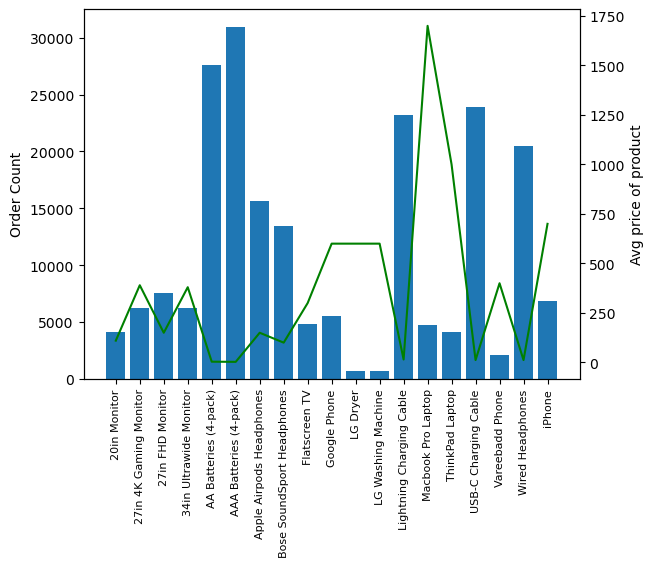

In [37]:
fig , ax1 = plt.subplots()

ax2 = ax1.twinx() ## as X-axis is same for both plots , ie we are sharing x-axis , ie we have to use ax2 = ax1.twinx()

ax1.bar(df['Product'] , df['Quantity Ordered'] )
ax2.plot(df['Product'] , df['Price Each'], color = 'g' )
ax1.set_xticklabels(products , rotation='vertical' , fontsize=8 )

ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg price of product')

#### Insights : 

The top selling product is 'AAA Batteries'. 

The top selling products seems to have a correlation with the price of the product. 

The cheaper the product higher the quantity ordered and vice versa.

#### problem statement 4: Monthwise sales trend of the most sold product ? 

In [38]:
# Top 5 most sold products-
data['Product'].value_counts()[0:5].index

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object', name='Product')

In [39]:
most_sold_product = data['Product'].value_counts()[0:5].index

In [40]:
most_sold_product_df = data[data['Product'].isin(most_sold_product)]


In [41]:
most_sold_product_df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta


In [42]:
most_sold_product_df.groupby(['Month' , 'Product']).size()

Month  Product                 
1      AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
2      AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
3      AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
4      AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
5      AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

In [43]:
pivot_table = most_sold_product_df.groupby(['Month' , 'Product']).size().unstack()

In [44]:
pivot_table

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
Month,,,,,
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729
6,1540,1451,1560,1531,1334
7,1555,1554,1690,1667,1434
8,1357,1340,1354,1339,1191
9,1314,1281,1324,1451,1173


<Axes: xlabel='Month'>

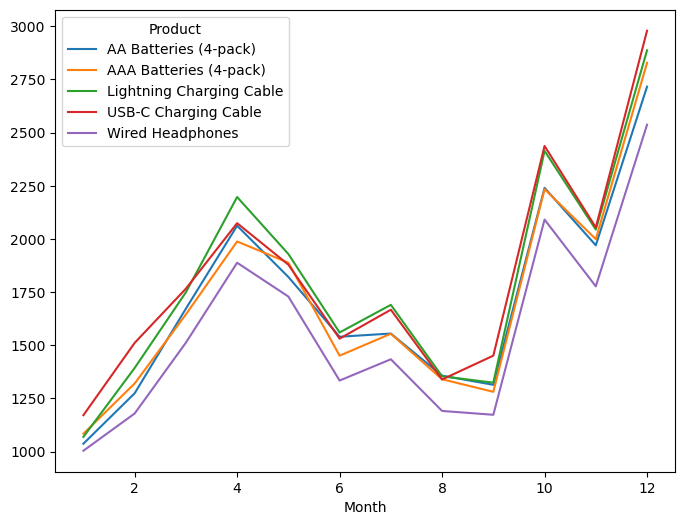

In [45]:
pivot_table.plot(figsize=(8,6))

#### Insights:
Max products sold in Dec Month.

Products have been sold more in April, Oct , Nov , Dec.

#### problem statement 5: What products are most often sold together ?

In [70]:
# orders that have same order Id, are sold mostly together.
duplicate_df = data[data['Order ID'].duplicated(keep=False)]

In [47]:
duplicate_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


In [48]:
duplicate_prod = duplicate_df.groupby(['Order ID'])['Product'].apply(lambda x : ','.join(x)).reset_index().rename(columns={'Product':'grouped_products'})

In [49]:
duplicate_prod

,Order ID,grouped_products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [52]:
# merge dataframes 
duplicate_prod_df = duplicate_df.merge(duplicate_prod , how='left' , on='Order ID')

In [53]:
duplicate_prod_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,grouped_products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14126,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,"Google Phone,USB-C Charging Cable"


In [57]:
# drop out all duplicate Order ID
no_dup_df = duplicate_prod_df.drop_duplicates(subset=['Order ID'])


In [55]:
no_dup_df.shape

(6879, 10)

In [61]:
no_dup_df['grouped_products'].value_counts()

grouped_products
iPhone,Lightning Charging Cable                     886
Google Phone,USB-C Charging Cable                   857
iPhone,Wired Headphones                             361
Vareebadd Phone,USB-C Charging Cable                312
Google Phone,Wired Headphones                       303
                                                   ... 
34in Ultrawide Monitor,20in Monitor                   1
Google Phone,Wired Headphones,Macbook Pro Laptop      1
LG Dryer,Vareebadd Phone                              1
20in Monitor,34in Ultrawide Monitor                   1
LG Washing Machine,AA Batteries (4-pack)              1
Name: count, Length: 350, dtype: int64

<Axes: ylabel='count'>

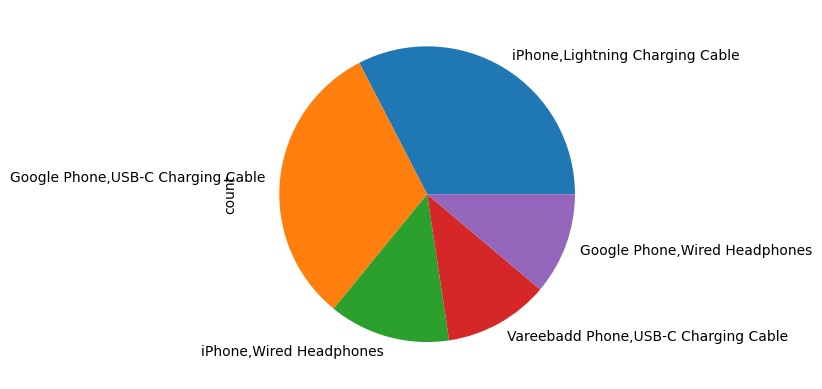

In [60]:
no_dup_df['grouped_products'].value_counts()[0:5].plot.pie()

#### Insights:
ie as soon as any Person will bought Iphone , we can recommend him charging cable , wired headphones 

ie as soon as any Person will bought Google phone , we can recommend him USB-c charging cable

This is a very important insight if someone is building recommendation system .

### Conclusion:

Based on the comprehensive analysis of the Amazon sales data, several key conclusions can be drawn:

1. **Seasonal Sales Patterns:**
   - December consistently stands out as the month with the highest sales, possibly due to increased holiday shopping.
   - Sales tend to peak in April, October, November, and December, indicating potential opportunities for targeted promotions during these months.

2. **Geographical Sales Distribution:**
   - San Francisco emerges as the city with the highest number of orders, followed by New York and Los Angeles.
   - These three cities contribute to more than half of the total orders, suggesting a concentrated customer base in these areas.

3. **Product Performance and Pricing:**
   - 'AAA Batteries' is the top-selling product, possibly due to its essential and frequently replaced nature.
   - The inverse correlation between product price and quantity ordered suggests customers are more willing to purchase lower-priced items in larger quantities.

4. **Product Bundling Opportunities:**
   - Analysis of frequently co-purchased products reveals potential opportunities for cross-selling and product bundling.
   - For example, customers buying iPhones often purchase charging cables and wired headphones, indicating a strong association between these products.

5. **Recommendation System Insights:**
   - The analysis provides crucial insights for building a recommendation system.
   - Identifying products that are frequently sold together can guide personalized product suggestions to customers, enhancing their shopping experience.

6. **Data Quality and Cleaning:**
   - Data cleaning steps, including handling missing values and removing duplicates, were performed effectively to ensure the accuracy of the analysis.
   
In conclusion, the analysis showcases valuable insights into sales trends, customer behavior, and potential business strategies. These insights can drive decision-making processes, such as targeted marketing campaigns during peak sales months, refining product pricing and bundling strategies, and developing a recommendation system to enhance customer satisfaction and increase sales revenue.

 